## Cluster Analysis of Solar Energy Projects in NY

###### This script contains the following: 
#### 1. Importing libraries and data
#### 2. Pre-processing data
##### 2.1 Removing categorical columns
##### 2.2 Standardise data
##### 2.3 Principal component analysis
#### 3. The elbow technique
#### 4. K-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\isobr\OneDrive\02052023Solar Programs NY\02. Prepared data'

In [4]:
df = pd.read_pickle(os.path.join(path,'solar_power_new.pkl'))

In [5]:
df.shape

(75564, 22)

In [6]:
df.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data,installation_size
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)",Small Solar
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)",Small Solar
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)",Small Solar
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)",Small Solar
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)",Small Solar


In [7]:
df.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size'],
      dtype='object')

In [29]:
df.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size', 'cluster'],
      dtype='object')

In [30]:
#export Df with outliers and clusters
df.to_pickle(os.path.join(path,'solar_outliers_cl.pkl'))

In [31]:
#export Df as excel
df.to_excel(r'C:\Users\isobr\OneDrive\02052023Solar Programs NY\02. Prepared data\export_solar_outliers_cl.xlsx', index=False)

### 2. Pre-processing data

#### 2.1 Removing categorical columns

In [8]:
#need to remove categorical data columns
df1=df.drop(columns=['index','project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size']) 

In [9]:
df1.head()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year
0,2.0,40.0,41800.00,6930.0,10.00,11738.0
1,1.0,28.0,30940.00,2520.0,7.00,8217.0
2,2.0,49.0,48387.50,11025.0,12.25,14380.0
3,1.0,15.0,23509.54,2943.0,4.91,5758.0
4,1.0,22.0,25283.00,5720.0,5.72,6714.0


#### 2.1. Standardize the data

In [10]:
#Standardize the data
X_std = StandardScaler().fit_transform(df1) # using the StandardScaler method to make sure the scales of the data are not too different

#### 2.2. Principal Component Analysis

In [11]:
pca = PCA(n_components=6) #there are six numeric variables
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x204725d7820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

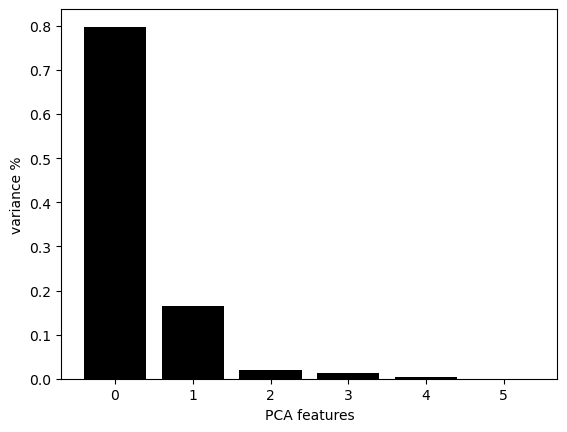

In [12]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

We see that there are three components that explain the majority of the data variance

In [13]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents) # I could use this dataframe to do the cluster analysis too

Text(0, 0.5, 'PCA 2')

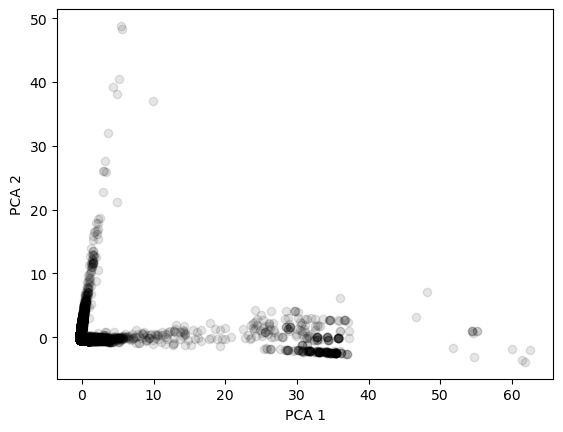

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Here just by plotting two of the components there appear to be two clusters

### 3. The elbow technique

Although we could use the resulting dataframe from the component analysis as input for the cluster analysis, here I chose to continue with the six variables, to gain some information on how they vary

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.4097711942417318e+16,
 -2132078252579125.2,
 -1440137847891837.2,
 -999567448629413.5,
 -781249805532225.5,
 -578575392065346.2,
 -445252167724777.1,
 -383839551536401.7,
 -328373804458058.9]

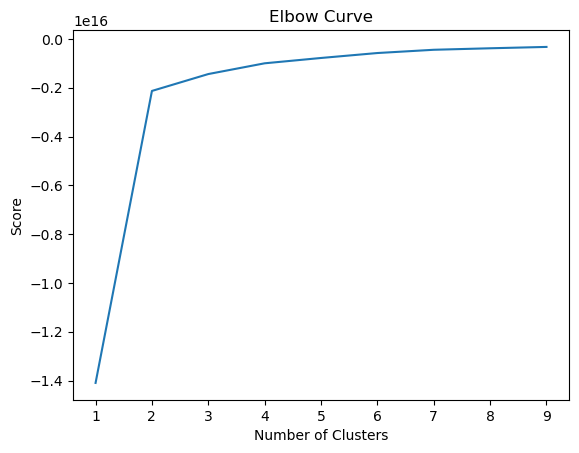

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

With the elbow curve, we also confirm that the ideal number of clusters is two

### 4. K-means clustering

Two clusters is maybe not sufficiently informative to understand the variety of the data, which means k-clustering may not be the best method for this dataset, but the two clusters still show significant differences

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [19]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=2)

In [20]:
df1['clusters'] = kmeans.fit_predict(df1)

In [21]:
df1.head()

,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,clusters
0,2.0,40.0,41800.00,6930.0,10.00,11738.0,0
1,1.0,28.0,30940.00,2520.0,7.00,8217.0,0
2,2.0,49.0,48387.50,11025.0,12.25,14380.0,0
3,1.0,15.0,23509.54,2943.0,4.91,5758.0,0
4,1.0,22.0,25283.00,5720.0,5.72,6714.0,0


In [22]:
df1['clusters'].value_counts()

0    75234
1      330
Name: clusters, dtype: int64

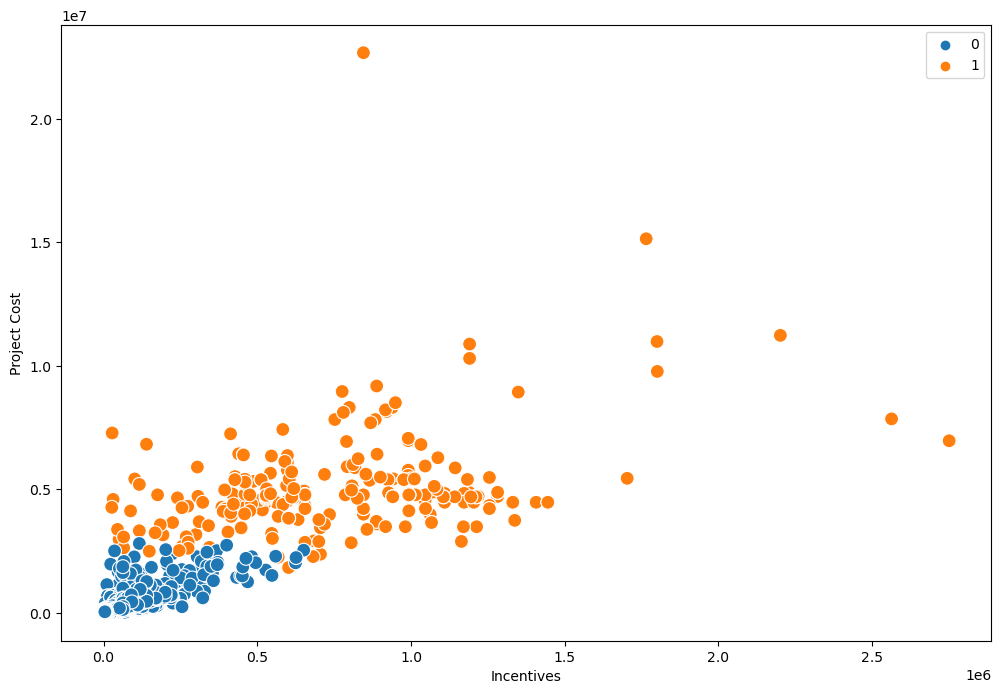

In [23]:
# Plot the clusters for the "incentive" and "project_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['incentive'], y=df1['project_cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Incentives') # Label x-axis.
plt.ylabel('Project Cost') # Label y-axis.
plt.show()

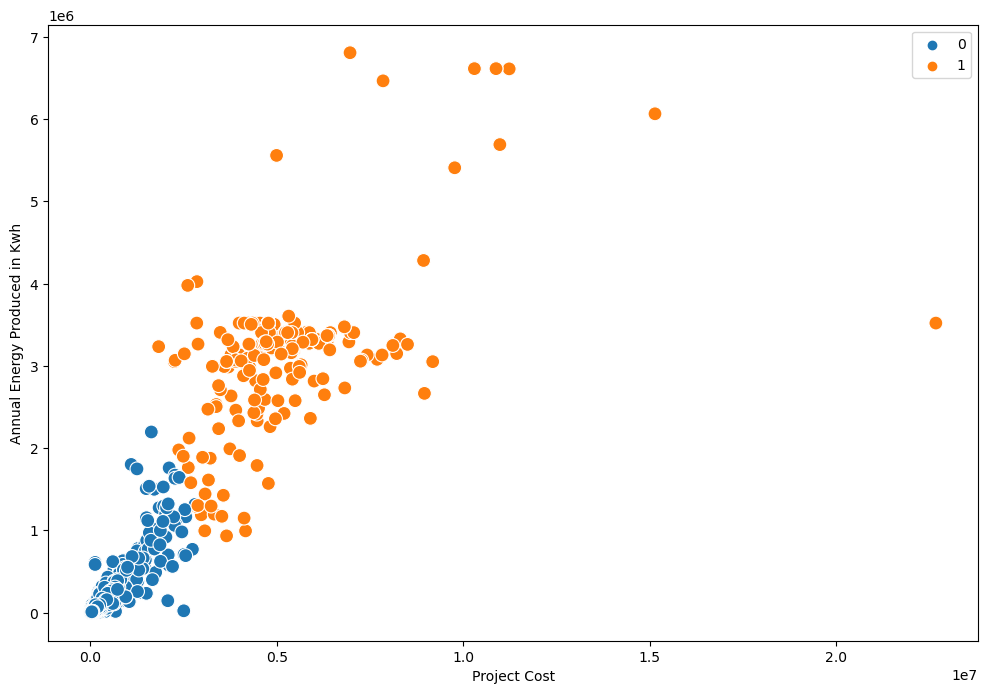

In [24]:
# Plot the clusters for project_cost  and kwh_year variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['project_cost'], y=df1['kwh_year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Project Cost') # Label x-axis.
plt.ylabel('Annual Energy Produced in Kwh') # Label y-axis.
plt.show()

In [27]:
#using loc function to create a cluster column/category
df.loc[df1['clusters'] == 0, 'cluster'] = 'blue'
df.loc[df1['clusters'] == 1, 'cluster'] = 'orange'

In [28]:
# use group by to compare clusters for inverter_quantity, pv_quantity, project_cost, incentive, kw_dc, kwh_year
df.groupby('cluster').agg({'inverter_quantity':['mean', 'median'], 
                         'pv_quantity':['mean', 'median'], 
                         'project_cost':['mean', 'median'],
                          'incentive':['mean', 'median'],
                          'kw_dc':['mean', 'median'],
                          'kwh_year':['mean', 'median']})

inverter_quantity         pv_quantity          project_cost  \
                     mean median         mean  median          mean   
cluster                                                               
blue             8.669019    1.0    39.830662    26.0  4.429650e+04   
orange          29.390909   27.5  8347.215152  8466.0  5.077872e+06   

                        incentive                    kw_dc           \
            median           mean      median         mean   median   
cluster                                                               
blue       31122.5    6692.315260    3305.015    11.275830     7.19   
orange   4771836.0  827746.896303  845092.960  2759.570394  2794.50   

             kwh_year             
                 mean     median  
cluster                           
blue     1.323512e+04     8445.0  
orange   3.239293e+06  3280296.0

The blue cluster has the lower values in all variables, and is quite different from the orange cluster, which includes also a number of outliers (i.e., large-scale industrial/commercial solar projects)